### 0. Import Data

In [23]:
import pandas as pd
import os
def load_data(file_path='data/train.csv', df=None, drop_columns=None, target_column=None):
    """
    Load and preprocess data from a CSV file.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    drop_columns : list
        List of columns to drop
    target_column : str
        Name of the target column
        
    Returns:
    --------
    X : pandas.DataFrame
        Feature matrix
    y : pandas.Series
        Target variable
    """
    # Load the data
    if df is None:
        df = pd.read_csv(file_path)
    if drop_columns:
        # Drop specified columns
        df.drop(columns=drop_columns, inplace=True)
    if target_column is None:
        return df
    # Extract target variable
    y = df[target_column]
    
    # Remove target from features
    df.drop(columns=[target_column], inplace=True)
    
    # Set feature matrix
    X = df
    
    return X, y

path = './adult_data.csv'
print(os.path.abspath(path))
print(os.path.exists(os.path.abspath(path)))
# for filename in os.listdir(path):
#     print(filename)

df = pd.read_csv(path, skiprows=[0,1])
df = load_data(df=df)
df

e:\Projects\Machine-learning-learning\adult_data.csv
True


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gross-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 1. EDA

#### df visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df.head()

# Basic filtering
# df[(df['column1'] == 'value1') | (df['column2'] == 'value2') & (df['column3'] == 'value3')]

# select columns by index
# columns =  df.columns # get columns
# df[['age','hours-per-week']] # by name
# df[columns[[1,5,7]]] # by columns
# df.iloc[:,3] # a number
# df.iloc[:,[3,5,6]] # a list
# df.iloc[:,::2] # a range
##########################
# Join
# we are interested in only patients from hospital1
# df_left = df1.merge(df2,how='left',on='ID') # IDs from the left dataframe (df1) are kept
# print(df_left)

# we are interested in only patients from hospital2
#df_right = df1.merge(df2,how='right',on='ID') # IDs from the right dataframe (df2) are kept
#print(df_right)

# we are interested in patiens who were in both hospitals
#df_inner = df1.merge(df2,how='inner',on='ID') # merging on IDs present in both dataframes
#print(df_inner)

# we are interested in all patients who visited at least one of the hospitals
#df_outer = df1.merge(df2,how='outer',on='ID')  # merging on IDs present in any dataframe
#print(df_outer)
############################
# Append dataframe
# df_append = pd.concat([df1,df2])

In [ ]:
def analyze_and_visualize_dataframe(df, figsize=(5, 3), continuous_bins='auto', 
                                   log_threshold=1000, max_categories=15, 
                                   plot_all=True, exclude_cols=None):
    """
    Analyze and visualize the statistical distribution of each column in a DataFrame.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame to analyze
    figsize : tuple, optional (default=(5, 3))
        Figure size for plots
    continuous_bins : str or int, optional (default='auto')
        Number of bins for continuous variables, 'auto' uses unique values or sqrt rule
    log_threshold : int, optional (default=1000)
        Threshold for using log scale if max/min ratio exceeds this value
    max_categories : int, optional (default=15)
        Maximum number of categories to display in bar plots
    plot_all : bool, optional (default=True)
        Whether to generate plots for all columns
    exclude_cols : list, optional (default=None)
        List of column names to exclude from analysis
        
    Returns:
    --------
    dict
        Dictionary with analysis results for each column
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import warnings
    
    warnings.filterwarnings('ignore', category=UserWarning)
    
    # Initialize results dictionary
    results = {}
    exclude_cols = exclude_cols or []
    
    # Track invisible/problematic data
    invisible_data = {}
    
    # Function to determine if a column should use log scale
    def should_use_log_scale(series):
        if series.min() <= 0:
            return False
        if series.max() / max(series.min(), 1e-10) > log_threshold:
            return True
        return False
    
    print(f"All columns and their data types ({len(df.columns)}):")
    print(df.dtypes)
    
    # Iterate through each column
    for col in df.columns:
        if col in exclude_cols:
            continue
            
        print(f"\n{'='*50}\nAnalyzing column: {col}\n{'='*50}")
        
        # Store basic information
        results[col] = {
            'dtype': str(df[col].dtype),
            'is_numeric': pd.api.types.is_numeric_dtype(df[col]),
            'unique_count': df[col].nunique(),
            'missing_count': df[col].isna().sum(),
            'missing_percentage': (df[col].isna().sum() / len(df)) * 100
        }
        
        # Print basic statistics
        print(f"Data type: {results[col]['dtype']}")
        print(f"Unique values: {results[col]['unique_count']}")
        print(f"Missing values: {results[col]['missing_count']} ({results[col]['missing_percentage']:.2f}%)")
        
        # Track invisible data
        if results[col]['missing_count'] > 0:
            invisible_data[col] = {'missing': results[col]['missing_count']}
            
        # For numeric columns
        if results[col]['is_numeric']:
            # Calculate descriptive statistics
            desc = df[col].describe()
            results[col]['stats'] = desc.to_dict()
            print("\nDescriptive statistics:")
            print(desc)
            
            # Detect zeros and infinities
            zero_count = (df[col] == 0).sum()
            inf_count = np.isinf(df[col]).sum() if np.issubdtype(df[col].dtype, np.number) else 0
            
            if zero_count > 0:
                print(f"Zero values: {zero_count} ({zero_count/len(df)*100:.2f}%)")
                invisible_data.setdefault(col, {})['zeros'] = zero_count
                
            if inf_count > 0:
                print(f"Infinite values: {inf_count} ({inf_count/len(df)*100:.2f}%)")
                invisible_data.setdefault(col, {})['infinities'] = inf_count
            
            # Detect if it should use log scale
            use_log = should_use_log_scale(df[col].dropna()) if log_threshold else False
            if use_log:
                print("Distribution is highly skewed, log scale recommended")
                results[col]['log_recommended'] = True
            else:
                results[col]['log_recommended'] = False
                
            # Plot histogram if requested
            if plot_all:
                plt.figure(figsize=figsize)
                
                # Determine bin count
                if continuous_bins == 'auto':
                    if results[col]['unique_count'] < 50:
                        bins = results[col]['unique_count']
                    else:
                        bins = int(np.sqrt(df.shape[0]))  # Square root rule
                else:
                    bins = continuous_bins
                
                # Use log scale if appropriate
                if use_log and df[col].min() > 0:
                    non_zero = df[col][df[col] > 0]
                    log_bins = np.logspace(
                        np.log10(max(non_zero.min(), 1e-10)),
                        np.log10(non_zero.max()),
                        bins
                    )
                    non_zero.plot.hist(bins=log_bins, log=True)
                    plt.semilogx()
                    print("Using log scale for visualization")
                else:
                    df[col].plot.hist(bins=bins)
                    
                plt.xlabel(col)
                plt.ylabel('count')
                plt.title(f'Distribution of {col}')
                plt.tight_layout()
                plt.show()
                
        # For categorical columns
        else:
            # Get value counts
            value_counts = df[col].value_counts()
            top_n = min(max_categories, len(value_counts))
            
            print(f"\nTop {top_n} values:")
            print(value_counts.head(top_n))
            
            if len(value_counts) > max_categories:
                print(f"... and {len(value_counts) - max_categories} more categories")
                
            results[col]['top_values'] = value_counts.head(top_n).to_dict()
            
            # Plot bar chart if requested
            if plot_all:
                plt.figure(figsize=figsize)
                
                if len(value_counts) > max_categories:
                    # For too many categories, show top N and group others
                    top_values = value_counts.head(max_categories-1)
                    others_sum = value_counts.iloc[max_categories-1:].sum()
                    
                    combined = pd.concat([
                        top_values, 
                        pd.Series({'Others': others_sum})
                    ])
                    
                    combined.plot.barh()
                    print(f"Grouped {len(value_counts) - (max_categories-1)} categories as 'Others'")
                else:
                    value_counts.plot.barh()
                    
                plt.ylabel(col)
                plt.xlabel('count')
                plt.title(f'Distribution of {col}')
                plt.tight_layout()
                plt.show()
    
    # Print summary of invisible data
    print("\n" + "="*50)
    print("SUMMARY OF NON-VISIBLE DATA:")
    print("="*50)
    
    if invisible_data:
        for col, issues in invisible_data.items():
            print(f"\n{col}:")
            for issue_type, count in issues.items():
                print(f"  - {issue_type}: {count} ({count/len(df)*100:.2f}%)")
    else:
        print("No non-visible data detected")
            
    return results

# Basic usage
results = analyze_and_visualize_dataframe(df)

# Custom usage
results = analyze_and_visualize_dataframe(
    df,
    figsize=(8, 4),
    continuous_bins=30,
    log_threshold=100,
    max_categories=10,
    exclude_cols=['id', 'customer_id']  # Skip these columns
)

# Just analyze without plotting
analysis = analyze_and_visualize_dataframe(df, plot_all=False)

#### plot

| *Visualization types*        	|    column continuous    	| column categorical 	|
|---------------------	|:----------------------:	|:-----------------:	|
| __column continuous__    	| scatter plot, heatmap 	| category-specific histograms, box plot, violin plot |
| __column categorical__   	| category-specific histograms, box plot, violin plot |  stacked bar plot  	|


##### scatter plot- points position distribution

In [ ]:
plt.figure(figsize=(5,3))
df.plot.scatter('age','hours-per-week',s=10,alpha=0.1) # alpha=0.1,s=10
plt.show()

##### heatmap - number of points distribution 

In [ ]:
def plot_2d_histogram(df, x_col, y_col, nbins=40, figsize=(5, 3), log_scale=True, 
                      min_count=0.1, tick_freq=4, cmap=None, title=None):
    """
    Create a 2D histogram heatmap from two DataFrame columns.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing the data
    x_col : str
        Column name for x-axis
    y_col : str
        Column name for y-axis
    nbins : int, optional (default=40)
        Number of bins for both axes
    figsize : tuple, optional (default=(5, 3))
        Figure size (width, height) in inches
    log_scale : bool, optional (default=True)
        Whether to apply log10 to the counts
    min_count : float, optional (default=0.1)
        Minimum value to replace zeros with (for log scaling)
    tick_freq : int, optional (default=4)
        Frequency of tick marks on both axes
    cmap : str or colormap, optional (default=None)
        Matplotlib colormap to use
    title : str, optional (default=None)
        Title for the plot
        
    Returns:
    --------
    matplotlib.figure.Figure
        The figure object containing the plot
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Create 2D histogram
    heatmap, xedges, yedges = np.histogram2d(df[x_col], df[y_col], bins=nbins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    # Replace zeros to avoid log(0) if using log scale
    if log_scale:
        heatmap[heatmap == 0] = min_count
    
    # Create figure
    fig = plt.figure(figsize=figsize)
    
    # Plot heatmap
    if log_scale:
        plt.imshow(np.log10(heatmap).T, origin='lower', vmin=0, extent=extent, cmap=cmap)
        cbar_label = 'log10(count)'
    else:
        plt.imshow(heatmap.T, origin='lower', extent=extent, cmap=cmap)
        cbar_label = 'count'
    
    # Add labels and ticks
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    # Add ticks at specified frequency
    x_ticks = np.linspace(xedges[0], xedges[-1], nbins+1)[::tick_freq]
    y_ticks = np.linspace(yedges[0], yedges[-1], nbins+1)[::tick_freq]
    plt.xticks(x_ticks, x_ticks.astype(int))
    plt.yticks(y_ticks, y_ticks.astype(int))
    
    # Add colorbar and title
    plt.colorbar(label=cbar_label)
    if title:
        plt.title(title)
    
    plt.tight_layout()
    return fig

# Basic usage
fig = plot_2d_histogram(df, 'age', 'hours-per-week')
plt.show()

# Customized usage
fig = plot_2d_histogram(
    df, 
    'age', 
    'hours-per-week', 
    nbins=50, 
    figsize=(8, 5), 
    log_scale=True, 
    cmap='viridis', 
    title='Age vs Hours per Week Distribution'
)
plt.show()

##### stacked bar plot - percentage distribution of categories

In [ ]:
def plot_stacked_categorical_distribution(df, x_col, y_col, figsize=(5, 3), legend_loc=4, 
                                          title=None, normalize=True, rotation=0):
    """
    Create a stacked bar chart showing the distribution of two categorical variables.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing the data
    x_col : str
        Column name for x-axis (categories to compare)
    y_col : str
        Column name for values to stack within each x category
    figsize : tuple, optional (default=(5, 3))
        Figure size (width, height) in inches
    legend_loc : int or str, optional (default=4)
        Location of the legend (1-10 or 'best', 'upper right', etc.)
    title : str, optional (default=None)
        Title for the plot
    normalize : bool, optional (default=True)
        Whether to normalize rows to show proportions instead of counts
    rotation : int, optional (default=0)
        Rotation angle for x-tick labels
        
    Returns:
    --------
    matplotlib.figure.Figure
        The figure object containing the plot
    pandas.DataFrame
        The count or normalized matrix used for plotting
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    
    # Count occurrences of each combination
    count_matrix = df.groupby([x_col, y_col]).size().unstack(fill_value=0)
    
    if normalize:
        # Normalize rows to show proportions
        matrix_for_plot = count_matrix.div(count_matrix.sum(axis=1), axis=0)
        ylabel = f'Fraction of {x_col} in each group'
    else:
        # Use raw counts
        matrix_for_plot = count_matrix
        ylabel = 'Count'
    
    # Create the plot
    fig = plt.figure(figsize=figsize)
    matrix_for_plot.plot(kind='bar', stacked=True)
    
    # Add labels and customize
    plt.ylabel(ylabel)
    plt.xlabel(x_col)
    plt.legend(loc=legend_loc, title=y_col)
    
    if title:
        plt.title(title)
    
    # Set rotation for x-tick labels
    plt.xticks(rotation=rotation)
    
    plt.tight_layout()
    
    return fig, matrix_for_plot

# Basic usage with default settings
fig, matrix = plot_stacked_categorical_distribution(df, 'race', 'gross-income')
plt.show()

# Customized usage
fig, matrix = plot_stacked_categorical_distribution(
    df, 
    'race', 
    'gross-income', 
    figsize=(10, 6),
    legend_loc='lower right',
    title='Income Distribution by Race',
    normalize=True,
    rotation=45
)
plt.show()

# Access the matrix data
print(matrix)

##### category-specific histograms - continuous distribution split by categories

In [ ]:
def plot_histograms_by_category(df, value_col, category_col, figsize=(8, 5), bins=20, 
                               alpha=0.5, density=True, range_tuple=None, 
                               title=None, colors=None, grid=True):
    """
    Plot overlapping histograms of a value column for each category in a categorical column.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing the data
    value_col : str
        Column name for the continuous variable to histogram (x-axis)
    category_col : str
        Column name for the categorical variable that defines groups
    figsize : tuple, optional (default=(8, 5))
        Figure size (width, height) in inches
    bins : int, optional (default=20)
        Number of bins for the histogram
    alpha : float, optional (default=0.5)
        Transparency level for the histogram bars
    density : bool, optional (default=True)
        Whether to normalize the histogram to show density instead of counts
    range_tuple : tuple, optional (default=None)
        Range of values to include in the histogram (min, max)
        If None, the range is determined from the data
    title : str, optional (default=None)
        Title for the plot
    colors : list or dict, optional (default=None)
        List of colors for each category or dictionary mapping categories to colors
    grid : bool, optional (default=True)
        Whether to show grid lines
        
    Returns:
    --------
    matplotlib.figure.Figure
        The figure object containing the plot
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Get unique categories
    categories = df[category_col].unique()
    
    # Determine range if not provided
    if range_tuple is None:
        range_tuple = (df[value_col].min(), df[value_col].max())
    
    # Create figure
    fig = plt.figure(figsize=figsize)
    
    # Create color mapping if colors provided as list
    if colors is not None and not isinstance(colors, dict):
        colors = {cat: color for cat, color in zip(categories, colors)}
    
    # Plot histograms for each category
    for i, category in enumerate(categories):
        # Get data for this category
        data = df[df[category_col] == category][value_col]
        
        # Skip if no data
        if len(data) == 0:
            continue
        
        # Get color for this category
        if colors is not None and isinstance(colors, dict):
            color = colors.get(category)
            plt.hist(data, alpha=alpha, label=category, range=range_tuple, 
                    bins=bins, density=density, color=color)
        else:
            plt.hist(data, alpha=alpha, label=category, range=range_tuple, 
                    bins=bins, density=density)
    
    # Add labels and customize
    plt.xlabel(value_col)
    plt.ylabel('Density' if density else 'Count')
    plt.legend(title=category_col)
    
    if title:
        plt.title(title)
    
    if grid:
        plt.grid(alpha=0.3)
    
    plt.tight_layout()
    
    return fig

# Basic usage with default settings
fig = plot_histograms_by_category(df, 'age', 'gross-income')
plt.show()

# Customized usage
fig = plot_histograms_by_category(
    df, 
    'age', 
    'gross-income', 
    figsize=(10, 6),
    bins=30,
    alpha=0.7,
    density=True,
    title='Age Distribution by Income Level',
    colors={'<=50K': 'blue', '>50K': 'red'}
)
plt.show()

##### box plot

In [ ]:
df[['age','gross-income']].boxplot(by='gross-income')
plt.ylabel('age')
plt.show()

##### violin plot

In [ ]:
import matplotlib.pyplot as plt
dataset = [df[df['gross-income']==' <=50K']['age'].values,
           df[df['gross-income']==' >50K']['age'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=50k','>50k'])
plt.ylabel('age')
plt.show()

#### correlation & autocorrelation

Correlation between Temp and lagged Temp:
0.9276437214262888


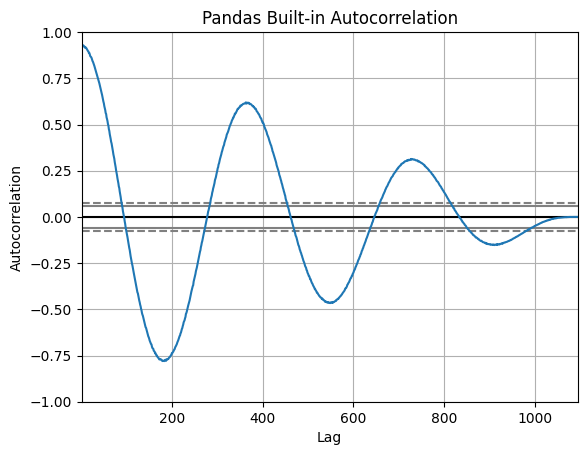

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Optional
import seaborn as sns

def correlation(x: pd.Series, y: pd.Series, method: str = 'pearson') -> float:
    """
    Compute correlation between two series with automatic alignment
    
    Args:
        x: First input series
        y: Second input series
        method: Correlation method ('pearson', 'spearman', 'kendall')
        
    Returns:
        Correlation coefficient
    """
    # Align and drop NA pairs
    aligned = pd.concat([x, y], axis=1).dropna()
    if len(aligned) < 2:
        return np.nan
    return aligned.iloc[:, 0].corr(aligned.iloc[:, 1], method=method)

def feature_target_correlation(
    X: Union[pd.DataFrame, np.ndarray],
    y: Union[pd.Series, np.ndarray],
    method: str = 'pearson',
    top_n: Optional[int] = None,
    visualize: bool = True,
    figsize: tuple = (10, 6)
) -> pd.DataFrame:
    """
    Compute correlation between all features and target variable.
    
    Args:
        X: Feature matrix (DataFrame or array)
        y: Target variable (Series or array)
        method: Correlation method ('pearson', 'spearman', 'kendall')
        top_n: Show only top N most correlated features (None for all)
        visualize: Whether to create a bar plot
        figsize: Figure size when visualizing
        
    Returns:
        DataFrame with correlations and p-values (sorted by absolute correlation)
    """
    # Convert inputs to pandas if they aren't already
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    # Calculate correlations
    corr_results = []
    for col in X.columns:
        # Drop NA pairs for each feature-target combination
        valid = pd.concat([X[col], y], axis=1).dropna()
        if len(valid) < 2:
            corr = np.nan
            pval = np.nan
        else:
            corr = valid.iloc[:, 0].corr(valid.iloc[:, 1], method=method)
            # Calculate p-value for pearson correlation
            if method == 'pearson':
                from scipy.stats import pearsonr
                _, pval = pearsonr(valid.iloc[:, 0], valid.iloc[:, 1])
            else:
                pval = np.nan
        
        corr_results.append({
            'feature': col,
            'correlation': corr,
            'abs_correlation': abs(corr),
            'p_value': pval
        })
    
    # Create results dataframe
    results = pd.DataFrame(corr_results).sort_values('abs_correlation', ascending=False)
    
    # Filter top N if requested
    if top_n is not None:
        results = results.head(top_n)
    
    # Visualization
    if visualize:
        plt.figure(figsize=figsize)
        sns.barplot(
            data=results,
            x='correlation',
            y='feature',
            palette='coolwarm',
            orient='h'
        )
        plt.axvline(0, color='black', linestyle='--')
        plt.title(f'Feature-Target Correlations ({method.title()} Method)')
        plt.xlabel('Correlation Coefficient')
        plt.ylabel('Features')
        plt.tight_layout()
        plt.show()
    
    return results.reset_index(drop=True)


# Example Usage
if __name__ == "__main__":
    # Create test data
    np.random.seed(42)
    dates = pd.date_range('2020-01-01', periods=365*3)
    temp = 20 + 10 * np.sin(2 * np.pi * np.arange(len(dates)) / 365) + np.random.normal(0, 2, len(dates))
    df_temp = pd.DataFrame({'Date': dates, 'Temp': temp}).set_index('Date')

    # Test correlation method
    print("Correlation between Temp and lagged Temp:")
    print(correlation(df_temp['Temp'], df_temp['Temp'].shift(1)))

    # Compare with pandas built-in
    pd.plotting.autocorrelation_plot(df_temp['Temp'])
    plt.title("Pandas Built-in Autocorrelation")
    plt.show()
    
    data = pd.DataFrame({
        'age': np.random.randint(20, 70, 100),
        'income': np.random.normal(50000, 15000, 100),
        'education': np.random.choice(['High School', 'College', 'Grad'], 100),
        'credit_score': np.random.randint(300, 850, 100),
        'target': np.random.normal(0, 1, 100) + 0.5 * np.random.randint(20, 70, 100)/100
    })


    # # One-hot encode categorical variables
    # data = pd.get_dummies(df, columns=[
    #     'workclass', 'education','marital-status', 'occupation', 
    #     'relationship', 'race', 'sex', 'native-country', 'gross-income'
    # ])
    # results = feature_target_correlation(
    #     X=data.drop('age', axis=1),
    #     y=data['age'],
    #     method='pearson',
    #     figsize=(10,18),
    #     visualize=True
    # )

#### f_regression & mutual_info_regression

In [ ]:
def analyze_feature_importance(X, y, problem_type='regression', k_best=None, percentile=None, visualize=True, random_state=10):
    """
    Analyze feature importance using F-test and mutual information, and select top features.
    
    Parameters:
    -----------
    X : pandas DataFrame or numpy.ndarray
        Feature matrix
    y : pandas Series or numpy.ndarray
        Target variable
    problem_type : str, optional (default='regression')
        Type of problem: 'regression' or 'classification'
    k_best : int, optional (default=None)
        Number of top features to select using SelectKBest
    percentile : int, optional (default=None)
        Percentile of top features to select using SelectPercentile
    visualize : bool, optional (default=True)
        Whether to visualize feature relationships
    random_state : int, optional (default=10)
        Random seed for reproducibility
    
    Returns:
    --------
    dict
        Dictionary containing f_test, p_values, mutual_information, selected_features_k_best,
        selected_features_percentile, and the transformed X data
        
        f_test: Linear relationships between features and target (The larger the better)
        p_values: array of p-values(The smaller the better, <0.5 means significant)
        mutual_information: Any statistical dependency (linear or non-linear) (The larger the better)
        selected_features_k_best: array of boolean values indicating selected features
        selected_features_percentile: array of boolean values indicating selected features
        X_k_best: array of selected features
        X_percentile: array of selected features
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    from sklearn.feature_selection import (
        f_regression, mutual_info_regression, 
        f_classif, mutual_info_classif,
        SelectKBest, SelectPercentile
    )
    
    np.random.seed(random_state)
    
    # Handle pandas DataFrame/Series if provided
    X_is_pandas = isinstance(X, pd.DataFrame)
    feature_names = X.columns if X_is_pandas else None
    
    # Convert to numpy arrays for computation if needed
    X_np = X.values if X_is_pandas else X
    y_np = y.values if isinstance(y, pd.Series) else y
    
    # Select appropriate scoring functions based on problem type
    if problem_type == 'regression':
        f_test_func = f_regression
        mi_func = mutual_info_regression
    elif problem_type == 'classification':
        f_test_func = f_classif
        mi_func = mutual_info_classif
    else:
        raise ValueError("problem_type must be 'regression' or 'classification'")
    
    # Calculate feature importance metrics
    f_test, p_values = f_test_func(X_np, y_np)
    mi = mi_func(X_np, y_np)
    
    # Print feature importance metrics with feature names if available
    if X_is_pandas:
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'F-Score': f_test,
            'P-Value': p_values,
            'Mutual Info': mi
        })
        print(feature_importance)
    else:
        print('f score', f_test)
        print('p values', p_values)
        print('mi', mi)
    
    # Visualization
    if visualize:
        plt.figure(figsize=(15, 5))
        for i in range(min(3, X_np.shape[1])):  # Show at most 3 features
            plt.subplot(1, min(3, X_np.shape[1]), i + 1)
            plt.scatter(X_np[:, i], y_np, edgecolor='black', s=20)
            
            # Use feature names if available
            if X_is_pandas:
                plt.xlabel(f"{feature_names[i]}", fontsize=14)
            else:
                plt.xlabel(f"$x_{{{i + 1}}}$", fontsize=14)
                
            if i == 0:
                plt.ylabel("$y$", fontsize=14)
            plt.title(f"F-test={f_test[i]:.2f}, MI={mi[i]:.2f}", fontsize=16)
        plt.tight_layout()
        plt.show()
    
    # Initialize return values
    result = {
        'f_test': f_test,
        'p_values': p_values,
        'mutual_information': mi,
        'selected_features_k_best': None,
        'selected_features_percentile': None,
        'X_k_best': None,
        'X_percentile': None
    }
    
    if k_best:
        # Select k best features
        f_select = SelectKBest(mi_func, k=k_best)
        X_k_best = f_select.fit_transform(X_np, y_np)
        selected_features_k_best = f_select.get_support()
        
        if visualize and k_best == 1:  # Only show if k=1
            plt.figure(figsize=(6, 4))
            plt.scatter(X_k_best, y_np, edgecolor='k')
            plt.xlabel('Selected Feature')
            plt.ylabel('Target')
            plt.title('Relationship with Selected Feature')
            plt.show()
        
        # Return a DataFrame if input was DataFrame
        if X_is_pandas:
            selected_feature_names = feature_names[selected_features_k_best]
            print("Selected features (k_best):", selected_feature_names.tolist())
            X_k_best = pd.DataFrame(X_k_best, columns=selected_feature_names, index=X.index)
        else:
            print("Selected features (k_best):", selected_features_k_best)
        
        result['selected_features_k_best'] = selected_features_k_best
        result['X_k_best'] = X_k_best
    
    if percentile:  
        # Select features by percentile
        f_selector = SelectPercentile(mi_func, percentile=percentile)
        X_percentile = f_selector.fit_transform(X_np, y_np)
        selected_features_percentile = f_selector.get_support()
        
        # Return a DataFrame if input was DataFrame
        if X_is_pandas:
            selected_feature_names = feature_names[selected_features_percentile]
            print("Selected features (percentile):", selected_feature_names.tolist())
            X_percentile = pd.DataFrame(X_percentile, columns=selected_feature_names, index=X.index)
        else:
            print("Selected features (percentile):", selected_features_percentile)
            
        result['selected_features_percentile'] = selected_features_percentile
        result['X_percentile'] = X_percentile
    
    return result
    
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(10)
X_np = np.random.rand(1000, 3)
y_np = X_np[:, 0] + np.sin(6 * np.pi * X_np[:, 1]) + 0.1 * X_np[:, 2]

# Convert to pandas DataFrame/Series
X = pd.DataFrame(X_np, columns=['feature_1', 'feature_2', 'feature_3'])
y = pd.Series(y_np, name='target')

# Analyze feature importance
results = analyze_feature_importance(X, y, k_best=2, percentile=66)

# Access results
if results['selected_features_k_best'] is not None:
    print("\nTop 2 features:", X.columns[results['selected_features_k_best']].tolist())
if results['selected_features_percentile'] is not None:
    print("Features in top 66 percentile:", X.columns[results['selected_features_percentile']].tolist())

### 1.5 Split data

In [ ]:
from sklearn.model_selection import train_test_split 
# create a test set without considering groups
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

from sklearn.model_selection import GroupShuffleSplit
# create a test set based on groups
groups = df['patient ID'] # a categorical column
splitter = GroupShuffleSplit(n_splits=1, train_size=.8, random_state=0)
for i_other,i_test in splitter.split(X, y, groups):
    X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
    X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

#### cv search

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.svm import SVC

kf = GroupKFold(n_splits=10)
# create the pipeline: preprocessor + supervised ML method
scaler = StandardScaler()
pipe = make_pipeline(scaler,SVC())
# the parameter(s) we want to tune
param_grid = {'svc__C': np.logspace(-3,4,num=8),'svc__gamma': np.logspace(-3,4,num=8)}
# prepare gridsearch
grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                    cv=kf, return_train_score = True)
# do kfold CV on _other
grid.fit(X_other, y_other, groups=groups_other)

### 2. handle missing data

#### Visualize missing value

In [ ]:
import matplotlib.pyplot as plt

def visualize_missing_value(df, plot=True):
    print('data dimensions:',df.shape)
    perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
    print('fraction of missing values in features:')
    print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
    print('data types of the features with missing values:')
    print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
    frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
    print('fraction of points with missing values:',frac_missing)

    if plot:
        plt.figure(figsize=(10, 6))
        plot_df = perc_missing_per_ftr[perc_missing_per_ftr > 0].sort_values(ascending=False)
        plot_df.plot(kind='bar', color='steelblue')

        plt.xlabel('feature')
        plt.ylabel('fraction of missing values')
        plt.title('Fraction of missing value of each feature')

        plt.ylim(0, max(perc_missing_per_ftr) * 1.15)

        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
        
visualize_missing_value(df)

#### Drop missing value by row/columns

In [ ]:
print(df.shape)
# by default, rows/points are dropped
df_r = df.dropna()
print(df_r.shape)
# drop features with missing values
df_c = df.dropna(axis=1)
print(df_c.shape)

#### Fillna

In [ ]:
df.fillna('missing')

df['A'] = df['A'].fillna(0)
df['C'] = df['C'].fillna(df['C'].mean())

df.fillna({'A': -1, 'B': 'empty'}, inplace=True)

### 3. data preprocessing

#### onehot_encode

In [ ]:
import pandas as pd

train_encoded = pd.get_dummies(df, columns=['column1', 'column2']) # , drop_first=True

# Align test data with same columns
test_df = df
test_encoded = pd.get_dummies(test_df, columns=['color'])
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

#### ordinal_encode

In [ ]:
def ordinal_encode_categories(df, columns, category_orders=None, suffix='_encoded', 
                             inplace=False, return_encoder=False):
    """
    Encode categorical columns using OrdinalEncoder with specified or inferred category orders.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing the categorical columns to encode
    columns : list
        List of column names to encode
    category_orders : dict or None, optional (default=None)
        Dictionary mapping column names to their desired category orders
        Example: {'size': ['small', 'medium', 'large']}
        If None, categories will be determined from the data
    suffix : str, optional (default='_encoded')
        Suffix to add to column names for the encoded versions
    inplace : bool, optional (default=False)
        Whether to modify the original DataFrame or create a copy
    return_encoder : bool, optional (default=False)
        Whether to return the fitted encoder object
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with added encoded columns
    sklearn.preprocessing.OrdinalEncoder (optional)
        The fitted encoder object, returned only if return_encoder=True
    """
    from sklearn.preprocessing import OrdinalEncoder
    import pandas as pd
    
    # Make a copy if not inplace
    if not inplace:
        df = df.copy()
    
    # Prepare categories
    if category_orders is None:
        # If no orders provided, let the encoder determine categories from the data
        encoder = OrdinalEncoder()
    else:
        # Use provided category orders
        categories = [category_orders.get(col, None) for col in columns]
        # For any None values, determine from data
        for i, cats in enumerate(categories):
            if cats is None:
                # Replace None with unique values from the column
                categories[i] = sorted(df[columns[i]].unique())
        encoder = OrdinalEncoder(categories=categories)
    
    # Fit and transform the data
    encoded_data = encoder.fit_transform(df[columns])
    
    # Create column names for encoded data
    encoded_columns = [f"{col}{suffix}" for col in columns]
    
    # Convert to DataFrame and add to original
    df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)
    
    # Add encoded columns to the original DataFrame
    for col in encoded_columns:
        df[col] = df_encoded[col]
    
    # Return results
    if return_encoder:
        return df, encoder
    else:
        return df

# Apply ordinal encoding
df_encoded = ordinal_encode_categories(df, ['education', 'workclass'])
print(df_encoded.columns)
print(df_encoded[['education_encoded', 'workclass_encoded']])

# If you need the encoder for later use:
df_encoded, encoder = ordinal_encode_categories(df, ['education', 'workclass'], return_encoder=True)

# To transform new data with the same encoder:
# new_encoded_data = encoder.transform(new_df[['size', 'priority']])

#### standard scaler

In [ ]:
def scale_numerical_df(df, mean=None, std=None):
    """
    Standardize numerical features in a DataFrame (z-score normalization)
    Args:
        df: Input pandas DataFrame
        mean: Precomputed mean Series (if None, computes from df)
        std: Precomputed std Series (if None, computes from df)
    Returns:
        Scaled DataFrame and computed (mean, std)
    """
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    if mean is None or std is None:
        # Compute mean and std while ignoring NaN values
        mean = df[numerical_cols].mean(skipna=True)
        std = df[numerical_cols].std(skipna=True)
        std[std == 0] = 1.0  # avoid division by zero
    
    # Create copy to avoid SettingWithCopyWarning
    df_scaled = df.copy()
    
    # Fill NaN with mean and apply scaling
    for col in numerical_cols:
        df_scaled[col] = df[col].fillna(mean[col])  # Replace NaN with mean
        df_scaled[col] = (df_scaled[col] - mean[col]) / std[col]
    
    return df_scaled, mean, std

#### minmax_scale

In [ ]:
def minmax_scale_df(df, min_val=None, max_val=None, feature_range=(0, 1)):
    """
    Min-Max scaling for numerical features in a DataFrame
    Args:
        df: Input pandas DataFrame
        min_val: Precomputed min Series (if None, computes from df)
        max_val: Precomputed max Series (if None, computes from df)
        feature_range: Desired range of transformed data (default 0-1)
    Returns:
        Scaled DataFrame and computed (min_val, max_val)
    """
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    if min_val is None or max_val is None:
        # Compute min and max while ignoring NaN values
        min_val = df[numerical_cols].min(skipna=True)
        max_val = df[numerical_cols].max(skipna=True)
    
    # Create copy to avoid SettingWithCopyWarning
    df_scaled = df.copy()
    
    # Handle constant features and calculate ranges
    ranges = max_val - min_val
    ranges[ranges == 0] = 1.0  # avoid division by zero
    
    a, b = feature_range
    
    for col in numerical_cols:
        # Replace NaN with midpoint of min/max
        df_scaled[col] = df[col].fillna(min_val[col] + ranges[col]/2)
        
        # Scale to [0, 1] then to target range
        df_scaled[col] = ((df_scaled[col] - min_val[col]) / ranges[col]) * (b - a) + a
    
    return df_scaled, min_val, max_val

#### simple_imputer

In [ ]:
def simple_imputer_df(df, strategy='mean', fill_value=0):
    """
    Basic missing value imputation for DataFrames
    Args:
        df: Input pandas DataFrame
        strategy: 'mean', 'median', 'constant', or 'mode'
        fill_value: Value to use for 'constant' strategy
    Returns:
        Imputed DataFrame
    """
    # Create copy to avoid SettingWithCopyWarning
    df_imputed = df.copy()
    
    # Handle numerical and categorical columns differently
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(exclude=['number']).columns
    
    # Numerical columns
    for col in num_cols:
        if strategy == 'mean':
            fill_val = df[col].mean(skipna=True)
        elif strategy == 'median':
            fill_val = df[col].median(skipna=True)
        elif strategy == 'mode':
            fill_val = df[col].mode()[0]  # Take first mode if multiple
        elif strategy == 'constant':
            fill_val = fill_value
        else:
            raise ValueError(f"Invalid strategy: {strategy}")
            
        df_imputed[col] = df[col].fillna(fill_val)
    
    # Categorical columns (always use mode or constant)
    for col in cat_cols:
        if strategy in ['mean', 'median']:
            # Default to mode for categorical when mean/median requested
            fill_val = df[col].mode()[0]
        elif strategy == 'mode':
            fill_val = df[col].mode()[0]
        else:  # constant
            fill_val = fill_value
            
        df_imputed[col] = df[col].fillna(fill_val)
    
    return df_imputed

### 4. Train model

#### PolynomialRegression

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class PolynomialRegression(nn.Module):
    def __init__(self, degree=2):
        super().__init__()
        self.degree = degree
        self.weights = nn.Parameter(torch.randn(degree + 1))
        
    def forward(self, x):
        # Generate polynomial terms: [x^0, x^1, x^2, ..., x^degree]
        powers = torch.stack([x**i for i in range(self.degree + 1)], dim=1)
        return torch.matmul(powers, self.weights)

# Example usage:
def train_poly_model(X, y, degree=2, epochs=1000, lr=0.01):
    # Convert to tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    
    # Model and optimizer
    model = PolynomialRegression(degree=degree)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    # Training loop
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')
    
    return model

#### LinearRegression

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate sample data
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 3 + torch.randn(X.size()) * 2  # y = 2x + 3 + noise

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output
        
    def forward(self, x):
        return self.linear(x)

# Initialize model, loss function, and optimizer
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')
    
    # Get the learned parameters
    w = model.linear.weight.item()
    b = model.linear.bias.item()
    print(f'Learned parameters: w = {w:.2f}, b = {b:.2f}')

# Plot the results
plt.scatter(X_test.numpy(), y_test.numpy(), color='blue', label='Actual')
plt.plot(X_test.numpy(), y_pred.numpy(), color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with PyTorch')
plt.show()

#### LogisticRegression

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate sample binary classification data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize model, loss function, and optimizer
model = LogisticRegression(X.shape[1])
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class == y_test).float().mean()
    print(f'Test Accuracy: {accuracy.item()*100:.2f}%')
    
    # Get the learned parameters
    w = model.linear.weight.detach().numpy().flatten()
    b = model.linear.bias.item()
    print(f'Learned parameters: w = {w}, b = {b:.2f}')

# Plot decision boundary (for 2D data)
if X.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y.numpy().flatten(), cmap='coolwarm', alpha=0.6)
    
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    # Predict probabilities
    with torch.no_grad():
        Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
        Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contour(xx, yy, Z.numpy(), levels=[0.5], colors='black')
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

#### xgBoost

In [ ]:
import numpy as np
import pandas as pd
import xgboost
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Create synthetic data for demonstration
def create_test_data(n_samples=1000, n_features=10, random_state=42):
    # Generate synthetic regression data
    X, y = make_regression(n_samples=n_samples, n_features=n_features, 
                           random_state=random_state)
    
    # Convert to DataFrame
    df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])
    y = pd.Series(y, name='target')
    
    # Add some missing values randomly
    mask = np.random.random(df.shape) < 0.05  # 5% of values will be missing
    df[mask] = np.nan
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=random_state)
    X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, random_state=random_state)
    
    return X_train, X_cv, X_test, y_train, y_cv, y_test

def train_and_evaluate_xgboost(X_train, X_cv, X_test, y_train, y_cv, y_test):
    # Create and configure model
    # max_depth |	Maximum depth of a tree	3 - 10
    # min_child_weight |	Minimum sum of instance weight (hessian) in a child(Higher -> stable)	1 - 10
    # gamma |	Minimum loss reduction to make a split(Higher -> stable)	0 - 5
    # subsample |	Row sampling ratio for each tree	0.5 - 1.0
    # colsample_bytree |	Feature sampling ratio per tree	0.5 - 1.0

    # learning_rate |	Step size shrinkage	0.01 - 0.3
    # n_estimators |	Number of boosting rounds (trees)	100 - 1000+
    # early_stopping_rounds |	Stop if no improvement after N rounds (needs validation set)	10 - 100

    # lambda |	L2 regularization on leaf weights	0 - 10
    # alpha |	L1 regularization on leaf weights	0 - 10
    # Parameter grid
    
    model = xgboost.XGBRegressor(
        learning_rate=0.03,
        n_estimators=1000,
        random_state=0,
        colsample_bytree=0.9,
        subsample=0.66
    )
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_cv_pred = model.predict(X_cv)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    cv_rmse = np.sqrt(mean_squared_error(y_cv, y_cv_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print results
    print('CV RMSE:', cv_rmse)
    print('Test RMSE:', test_rmse)
    print('Test R2:', test_r2)
    
    return model, y_test_pred

# Run the example
if __name__ == "__main__":
    # Generate test data
    X_train, X_cv, X_test, y_train, y_cv, y_test = create_test_data()
    
    print("Data shapes:")
    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"X_cv: {X_cv.shape}, y_cv: {y_cv.shape}")
    print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
    print("\nMissing values in X_train:", X_train.isna().sum().sum())
    
    print("\nTraining XGBoost model...")
    model, predictions = train_and_evaluate_xgboost(
        X_train, X_cv, X_test, y_train, y_cv, y_test
    )
    
    # Display feature importances
    importances = pd.Series(model.feature_importances_, index=X_train.columns)
    print("\nTop 5 feature importances:")
    print(importances.sort_values(ascending=False).head(5))

#### shap

In [ ]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values_valid = explainer(X_test)
shap.summary_plot(shap_values_valid, X_test)
shap.plots.bar(shap_values_valid)

shap_values_train = explainer(X_train)
shap_values_valid = explainer(X_test)

shap.summary_plot(shap_values_train, X_train, plot_type="bar")
shap.summary_plot(shap_values_valid, X_test, plot_type="bar")

### 5. Metrics

#### ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score

# - x axis: false positive rate (fpr = FP / (FP + TN))
# - y axis: true positive rate (R = TP / (TP + FN))
# - AUC = 1 is a perfect classifier
# - AUC > 0.5 is above chance-level predictor
# - AUC = 0.5 is a chance-level classifier
# - AUC < 0.5 is a bad predictor
# - AUC = 0 classifies all points incorrectly

from sklearn.metrics import roc_curve
# # the roc_curve function performs the same calculation
fpr,tpr,p_crits = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

print(roc_auc_score(y_test,y_pred))

#### P-R cure

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score # the AUC of the P-R curve

p,r,p_crits = precision_recall_curve(y_test,y_pred)

print(average_precision_score(y_test,y_pred))

plt.plot(p,r)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('P-R curve')
plt.show()

#### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_np = y_pred.numpy().squeeze()
y_pred_for_matrix = np.zeros(len(y_test))

# Perform thresholding
y_pred_for_matrix[y_pred_np > 0.5] = 1
C = confusion_matrix(y_test,y_pred_for_matrix)
disp = ConfusionMatrixDisplay(C,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.show()

#### acc, recall, precision, F1

If $\beta < 1$, more weight to precision.

If $\beta > 1$, more weight to recall.

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
print('accuracy',accuracy_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1',fbeta_score(y_test,y_pred,beta=1))

### 6. GridSearch

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, TensorDataset

# Dummy dataset generator (for illustration)
def generate_dummy_data(num_samples=1000, input_size=20, num_classes=2):
    X = torch.randn(num_samples, input_size)
    y = torch.randint(0, num_classes, (num_samples,))
    return TensorDataset(X, y)

# Example model class
class MyModel(nn.Module):
    def __init__(self, hidden_size, input_size=20, num_classes=2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# Train + eval function
def train_and_eval(dataset, model, optimizer, loss_fn, batch_size):
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_ds, val_ds = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Train for a few epochs
    model.train()
    for epoch in range(5):  # Keep it short for tuning
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()

    # Evaluate accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            predicted = preds.argmax(dim=1)
            correct += (predicted == yb).sum().item()
            total += yb.size(0)

    accuracy = correct / total
    return accuracy


In [ ]:
def custom_grid_search(param_grid, train_fn, dataset, verbose=True):
    """
    Manual Grid Search implementation, suitable for any training function, 
    such as PyTorch or scikit-learn models.

    Args:
        param_grid: list of dicts, where each dict is a combination of hyperparameters
        train_fn: a function that takes one parameter set and returns (model_object, validation_score)
        
        verbose: whether to print progress during the search

    Returns:
        best_params: the parameter set with the highest score
        best_model: the model corresponding to the best parameter set
        all_results: list of all results (each with params and score)
    """
    best_score = -float('inf')
    best_model = None
    best_params = None
    all_results = []

    for i, params in enumerate(param_grid):
        model, score = train_fn(params, dataset)
        all_results.append({'params': params, 'score': score})

        if verbose:
            print(f"[{i+1}/{len(param_grid)}] Params: {params} -> Score: {score:.4f}")

        if score > best_score:
            best_score = score
            best_model = model
            best_params = params

    return best_params, best_model, all_results

def train_model(params, dataset):
    # Example: training a PyTorch model
    lr = params['lr']
    batch_size = params['batch_size']
    hidden = params['hidden']
    
    # Initialize your model, optimizer, and loss function here
    model = MyModel(hidden_size=hidden)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = torch.nn.CrossEntropyLoss()
    
    # Pseudo-code: load data, train for several epochs, evaluate on validation set
    val_accuracy = train_and_eval(dataset, model, optimizer, loss_fn, batch_size)
    
    return model, val_accuracy

import itertools

# Construct the parameter grid (like in sklearn's GridSearch)
param_grid = [
    {'lr': lr, 'batch_size': bs, 'hidden': h}
    for lr in [0.001, 0.01]
    for bs in [32, 64]
    for h in [128, 256]
]

dataset = generate_dummy_data()
best_params, best_model, all_results = custom_grid_search(param_grid, train_model, dataset)
print("✅ Best parameters:", best_params)

### 7. Coef for logistic regression

In [ ]:
# Coef from logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Show coefficients and intercepts
print("Coefficients:", model.coef_)
print("Intercepts:", model.intercept_)